# Imports


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from random import choice
from operator import itemgetter
from math import exp
from math import e

#  Read Data

In [6]:
def reader():
    '''
    converts the LIBSVM format into a dictionary, where the points(x1,x2) 
    are stored as tuple as keys and the class is the value
    '''
    dictionary = {}
    data = open('LIBSVM format.txt', 'r') 
    for x in data: 
        x_i = x.split()
        classification = int(x_i.pop(0))
        for pointset in x_i:
            pointset = pointset.split(':')
            dictionary[(int(pointset[0]),int(pointset[1]))]=int(classification)
    return dictionary


# Linear classification with Perceptron

## Threshold

In [90]:
#Test threshold function with an english data set
threshold(np.array([15162,990]),class1 = 'english', class0='french')

/Users/ramonabendias/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:20: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


'english'

In [80]:
def threshold(x,w = None, class1 = 1, class0 = 0):
    '''
    Classifies the point x depending on the actual given linear seperator w
    
    param x: point 
    type x: array with x1 and x2 (number of characters, number of A's) 
    
    param w: linear seperator
    type w: array with w_0 and w_1
    
    param class1: name of the class below the linear seperator  (0 > w_0 +w_1*x1-x2)
    type class1: eigther {0,1} or a string
    
    param class0: name of the class above the linear seperator  (0 < w_0 +w_1*x1-x2)
    type class1: eigther {0,1} or a string
    
    return: threshold value (1 or 0) or class name, (w*x)=1 if w*x ≥0 and 0 otherwise (after adding a dummy input to w and x) 
    '''
    
    if w == None: 
        w, miss, t = perceptron_learning() 
    x = np.insert(x, 0, 1)
    w = np.insert(w,2,-1)      # add dummy input
    product = np.dot(w.T,x)
    if product >= 0:
        return class1
    else:
        return class0

## Stop criterion (Misclassified points)

In [34]:
def misclassified(w, dictionary):
    '''
    Counts the misclassified points 
    
    return miss: number of misclassified points 
    '''
    miss = 0
    for x in dictionary:
        x_array = np.array([x[0],x[1]])
        if dictionary.get(x, 'none') != threshold(x_array,w):
            miss += 1
    return miss
        
    

## Perceptron

In [88]:
def perceptron_learning(plot = False):
    '''
    Calculates the seperator line and plots the misclassified points against the number of interations
    
    param plot: Determines whether to plot the percentage of misclassified points against the number of updated weights or not. 
    type plot: True or False (default = False)
    
    return: w (Coefficients of the linear seperator), miss (number of misclassified points), t (number of iterations)
    '''
    dictionary = reader()  
    w = np.array([0,1])         # start line w_1*x + w_0
    t = 0                       # number of interations
    miss = 15                   #number of misclassified points
    miss_percentage = [] 
    
    while miss != 0:                 #until all points are classified correct
        alpha = 100/(100+t)*0.0001            # varies learning rate 
        x = choice(list(dictionary.keys()))   #random point out of dictionary
        trueclass = dictionary.get(x, "none")
        x = np.array([x[0],x[1]])
        w = w + alpha*(trueclass - threshold(x,w))*x #updating the weights
        t += 1
        miss = misclassified(w, dictionary)
        miss_percentage.append(1-miss/30)
        
    t_range = np.arange(1,t+1)
    plt.plot(t_range,miss_percentage,'.')
    plt.xlabel('number of weight updates')
    plt.ylabel('Proportion correct')
    if plot == True:
        plt.show()
    return w, miss, t

In [86]:
def plot():
    '''
    Plots the linear seperator with the training data set
    
    '''
    dictionary = reader()
    
    max_x1 = max(list(dictionary.keys()),key=itemgetter(1))[0]
    
    septerator, miss, t = perceptron_learning(plot = False)

    x2 = max_x1*septerator[1] + septerator[0]
    
    plt.plot([0,max_x1], [septerator[0],x2], 'g-')
    plt.text(10000, 4000, r'$x_2 \approx x_1*{}+({})$'.format(format(septerator[1], '.4f'), format(septerator[0], '.4f')))
    
    for points in dictionary:
        if dictionary[points]==1:
            plt.plot(points[0],points[1],'r.')
        else:
            plt.plot(points[0],points[1],'b.')
    
    plt.xlabel('Characters')
    plt.ylabel('A\'s')
    plt.show()
    return
    
    

/Users/ramonabendias/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:20: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


0


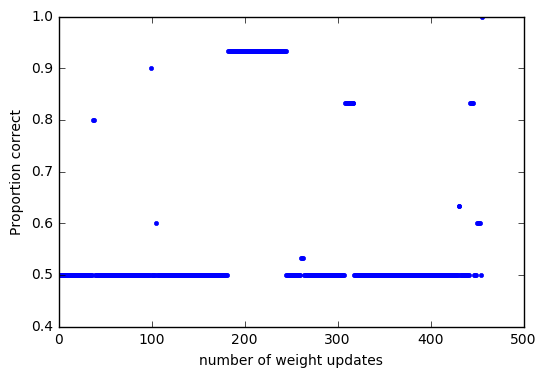

(array([-4.57158677,  0.06644167]), 0, 455)

In [81]:
#test 
perceptron_learning(plot=True)

/Users/ramonabendias/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:20: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


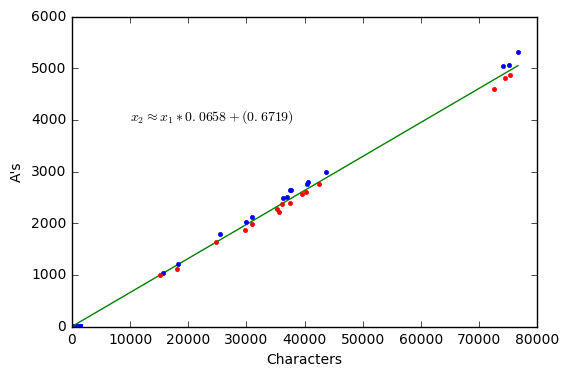

In [89]:
#test
plot()

# Logistic Regression

## Classifier (User)

In [96]:
#Test threshold function with an english data set
user_classification(np.array([15162,990]),class1 = 'english', class0='french')

'english'

In [97]:
def user_classification(x,class1=1,class0 = 0, gradient_ascent='stochastic'):
    '''
    determines the class of the point x 
     
    param x: point which should be classified 
    type x: array with x1 and x2 (number of characters, number of A's) or None 
    
    param gradient_ascent: stochastic or batch gradient ascent (default = stochastic)
    type gradient_ascent: string (whether stochastic or batch)
    
    return: class 
    '''
    
    dictionary = reader()
    w, error, t = logistic_regression(gradient_ascent)
    w = np.insert(w,2,-1) 
    x_extended = np.insert(x, 0, 1)
    try: 
        if (1/(1+exp(-np.dot(w.T,x_extended)))) > 0.5:
            classification = class1         
    except OverflowError:
        if -np.dot(w.T,x_extended) > 0 and trueclass == 1:
            classification = class0
    return classification

## Derivative of the likelihood

In [2]:
def derivatives_of_the_likelihood(w,x, dictionary, gradient_ascent = 'stochastic', printing=None):
    '''
    Calculates the derivatives of the likelihood either either one or more dimensional
    
    param gradient_ascent: stochastic or batch gradient ascent (default = stochastic)
    type gradient_ascent: string (whether stochastic or batch)
    
    returns: the derivative as numpy array
    '''
    
    w = np.insert(w,2,-1)    
    
    #--- stochastic ---
    if gradient_ascent == 'stochastic':
        trueclass = dictionary.get((x[0],x[1]), "none")
        x_extended = np.insert(x, 0, 1)
        try: 
            derivative = x*(trueclass-1/(1+exp(-np.dot(w.T,x_extended)))) 
        except OverflowError:   
            if -np.dot(w.T,x_extended) >0:
                derivative = x*(trueclass-0)
            else: 
                derivative = x*(trueclass-1)
    
    
    
    #--- batch ---
    else:
        derivative = np.array([0,0])
        for x in dictionary:
            trueclass = dictionary.get(x, "none")
            x = np.array([x[0],x[1]])
            x_extended = np.insert(x, 0, 1)
            try: 
                derivative = np.add(derivative, x*(trueclass-1/(1+exp(-np.dot(w.T,x_extended)))) , out=derivative, casting="unsafe") 
            except OverflowError:
                if -np.dot(w.T,x_extended) >0:
    
                    derivative = np.add(derivative, x*(trueclass-0), out=derivative, casting="unsafe")
                else: 
                    derivative = np.add(derivative, x*(trueclass-1), out=derivative, casting="unsafe")
    return derivative

## logistic regression algorithm 

In [104]:
def logistic_regression(gradient_ascent='stochastic', plot =False):
    '''
    The logistic regression function determines the linear seperator with a logistic threshold function
    
    param gradient_ascent: stochastic or batch gradient ascent (default = stochastic)
    type gradient_ascent: string (whether stochastic or batch)
    
    param plot: Determines whether to plot the percentage of misclassified points against the number of updated weights or not. 
    type plot: True or False (default = False)
    
    returns: the seperator w, the last calculated error (norm of the derivative), the number of iterations t or class of the 
    '''
    dictionary = reader()  
    w = np.array([0,1]) # start line w_1*x + w_0
    t = 0    # number of interations
    error = np.inf
    miss_percentage = []
    while t < 10000:      # until 100% classified correct
        alpha = 100/(100+t)*0.0001
        x = choice(list(dictionary.keys()))
        x = np.array([x[0],x[1]])
        w = w + alpha*derivatives_of_the_likelihood(w,x, dictionary, gradient_ascent)  # update weight
        
       
        error= np.linalg.norm(derivatives_of_the_likelihood(w,x,dictionary, gradient_ascent='batch' ))
        t +=1 
        miss_percentage.append(1-misclassified_logistic(w)/30)
    
    
    if plot == True:
        t_range = np.arange(1,t+1)
        plt.plot(t_range,miss_percentage,'.')
        plt.xlabel('number of weight updates')
        plt.ylabel('Proportion correct')
        plt.show()
    return w, error, t

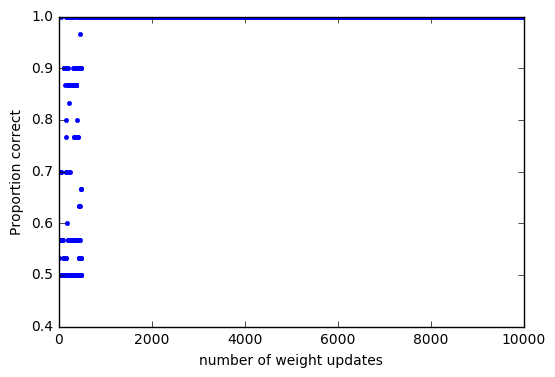

(array([-1.97417688,  0.06597144]), 2.0, 10000)

In [105]:
#test logistic regression with plot
logistic_regression(plot=True) 

## Misclassified points

In [91]:
def misclassified_logistic(w):
    
    dictionary = reader()
    miss = 0 
    w = np.insert(w,2,-1) 
    for x in dictionary:
        trueclass = dictionary.get(x, "none")
        x = np.array([x[0],x[1]])
        x_extended = np.insert(x, 0, 1)
    
        try: 
            if (1/(1+exp(-np.dot(w.T,x_extended)))) > 0.5 and trueclass == 0:
                miss +=1           
            
        except OverflowError:
            if -np.dot(w.T,x_extended) > 0 and trueclass == 1:
                miss +=1

    return miss